## Layer Air Quality Prediction

#### Analyzing and Visualizing the data

In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [575]:
data = pd.read_csv('train.csv')
data.head(10)

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_JBYXJEUZ8X,2020-03-18,ANQ16PZJ,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,ID_PEJJNLBUPR,2019-10-13,AB6051M4,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,ID_21L8UZQO1T,2019-12-21,A0WN66FH,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,ID_GNW2G8J4T8,2020-02-20,aq_41,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,ID_4XOX2V6SK0,2019-04-17,aq_41,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229
5,ID_RESPV15C4Y,2019-05-15,aq_41,-1.244985,29.989236,0.914579,17.469583,0.000245,0.815039,0.000199,...,5637.916992,58241.449219,4637.916992,6.645219,0.338752,71.967140,61.495815,-32.054935,23.896311,56.001535
6,ID_FWEZDXVKTK,2020-07-25,aq_54,0.356400,32.573000,0.032712,0.824242,-0.000264,0.867042,-0.000229,...,5643.809570,58946.234375,4643.809570,1.872675,0.207662,73.585297,43.742649,-36.165455,23.974648,117.791837
7,ID_A4ABGIG6UT,2020-06-20,A0WN66FH,0.285751,32.578325,0.762760,22.829167,-0.000223,0.703101,-0.000149,...,8975.214594,37861.513890,7975.214646,5.344215,0.278756,-98.280289,52.850706,-49.421633,37.231126,58.978750
8,ID_EDGMV458YP,2020-05-15,AY2J2Q7Z,0.307584,32.567078,0.810979,23.763889,NaN,NaN,NaN,...,6445.978285,52559.373115,5445.978320,10.972843,0.328622,-101.567986,15.719202,-51.297768,30.968523,41.652083
9,ID_EF1FHKWCP9,2020-05-09,aq_54,0.356400,32.573000,0.868716,22.353030,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.291382


In [576]:
data.shape

(9923, 71)

In [577]:
data.describe()

,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
count,9923.000000,9923.000000,9923.000000,9903.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,...,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,9923.000000
mean,0.242512,32.472012,0.790819,21.571340,0.000025,0.791470,0.000014,0.146898,-17.585282,37.885657,...,6334.871458,56017.987582,5405.379477,17.943963,0.269046,-17.784138,40.689597,-86.994058,27.792085,57.107307
std,0.332311,0.545655,0.157910,4.060502,0.000299,0.197640,0.000207,0.085867,86.751706,19.323026,...,3172.279161,19694.711846,3073.159743,33.709480,0.052252,86.453994,19.073526,40.091767,6.905511,27.482947
min,-1.244985,29.989236,0.000000,0.000000,-0.000996,0.345894,-0.000671,0.000000,-105.713519,0.100934,...,1150.149929,15003.535156,1150.149929,1.250367,0.012392,-106.727040,0.101032,-160.284790,8.387497,1.160400
25%,0.289040,32.553714,0.770865,21.233081,-0.000149,0.659173,-0.000117,0.084368,-99.640536,22.521445,...,3948.409668,39480.238281,2952.133894,4.790914,0.240371,-99.612631,26.535263,-126.529379,23.377410,38.028288
50%,0.315446,32.589580,0.822951,22.271875,0.000010,0.785107,0.000009,0.148113,-97.301544,42.489365,...,5768.341064,57283.976562,4768.781361,6.774909,0.267970,-97.295380,45.016811,-85.782608,28.024277,51.930242
75%,0.354700,32.617600,0.869333,23.314268,0.000182,0.906811,0.000139,0.216913,73.653023,55.985201,...,8665.129820,71602.269531,7665.129820,14.080288,0.295240,72.932994,57.407260,-50.006933,32.795132,72.033125
max,0.391478,32.752570,1.000000,29.735000,0.001880,1.633184,0.002445,0.299840,84.742798,66.024800,...,15000.000287,88513.484375,14000.000268,250.000000,1.000000,84.802010,66.234421,-20.702782,41.993103,440.920000


In [578]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        9923 non-null   object 
 1   date                                                      9923 non-null   object 
 2   device                                                    9923 non-null   object 
 3   site_latitude                                             9923 non-null   float64
 4   site_longitude                                            9923 non-null   float64
 5   humidity                                                  9923 non-null   float64
 6   temp_mean                                                 9903 non-null   float64
 7   SulphurDioxide_SO2_column_number_density                  4291 non-null   float64
 8   SulphurDioxide_SO2

##### Checking for missing values

In [579]:
data.isnull().sum()

ID                               0
date                             0
device                           0
site_latitude                    0
site_longitude                   0
                              ... 
Cloud_sensor_azimuth_angle    1509
Cloud_sensor_zenith_angle     1509
Cloud_solar_azimuth_angle     1509
Cloud_solar_zenith_angle      1509
pm2_5                            0
Length: 71, dtype: int64

In [580]:
count = 0
check = False

for i in data.isnull().any(axis=0):
    if i != check:
        count += 1

print(f'Out of the 71 columns, there are {count} columns with missing values')

Out of the 71 columns, there are 64 columns with missing values


##### Checking for categorical features

In [581]:
dev = data['device']

unique_cat = len(dev.unique())
print(f'Feature device has {unique_cat} unique categories')

Feature device has 34 unique categories


In [582]:
print(data['device'].value_counts().sort_values(ascending=False))

aq_30       464
aq_41       453
aq_45       372
aq_43       359
aq_46       352
aq_49       351
APYZC5J7    329
AR2RHV97    329
AY2J2Q7Z    328
AW66FF7V    328
APZ80RTM    328
A0WN66FH    328
AKSLS0FP    328
ANQ16PZJ    328
AB6051M4    328
AJCK5L86    328
A95X5F9T    328
aq_29       314
aq_52       295
aq_54       284
aq_35       281
aq_36       279
aq_61       268
aq_59       261
aq_31       254
aq_47       244
aq_70       239
aq_60       235
aq_56       221
aq_74       204
aq_79       181
aq_57       161
aq_64       127
aq_76       114
Name: device, dtype: int64


##### Visualizing the data

Text(0, 0.5, 'pm2_5')

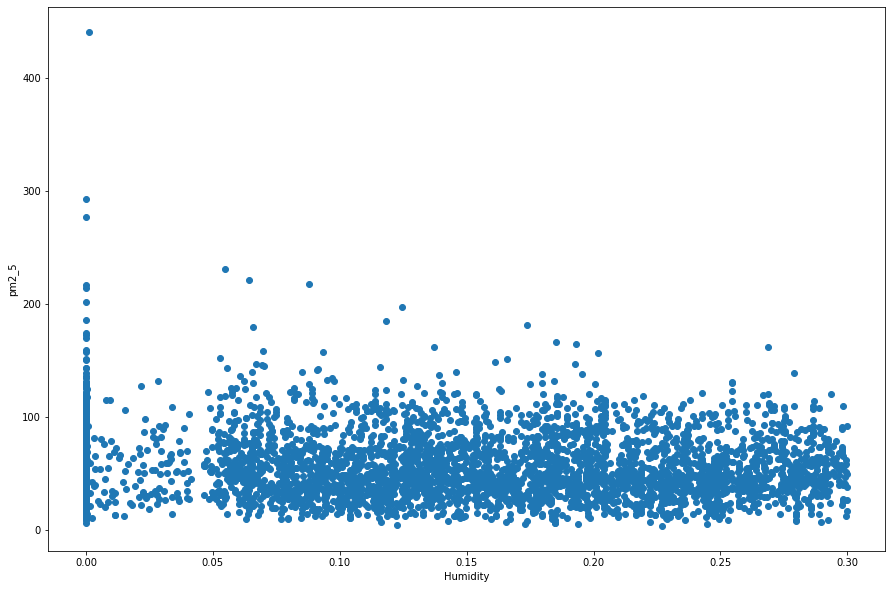

In [583]:
temp = data['SulphurDioxide_cloud_fraction']
label = data['pm2_5']

fig = plt.figure(figsize=(15,10))
plt.scatter(temp, label)
plt.xlabel('Humidity')
plt.ylabel('pm2_5')

#### Cleaning the data

##### Dropping the irrelevant columns

In [584]:
data_drop = data.drop(['ID', 'date'], axis=1)

In [585]:
data_drop.head()

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ANQ16PZJ,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,0.291358,76.594910,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,AB6051M4,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,A0WN66FH,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,aq_41,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,0.000000,75.789885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,aq_41,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,0.087338,74.787279,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229


##### Encoding the categorical feature first using Label Encoding

In [586]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_drop['device'] = labelencoder.fit_transform(data_drop['device'])

In [587]:
data_drop.head()

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,5,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,0.291358,76.594910,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,2,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,0,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,16,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,0.000000,75.789885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,16,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,0.087338,74.787279,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229


In [588]:
drop = data_drop.drop(['SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_solar_azimuth_angle', 
                        'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_sensor_zenith_angle', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 
                        'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_absorbing_aerosol_index', 'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
                        'NitrogenDioxide_sensor_azimuth_angle', 'NitrogenDioxide_solar_zenith_angle', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
                        'Formaldehyde_sensor_zenith_angle', 'UvAerosolIndex_solar_azimuth_angle', 'Cloud_solar_zenith_angle'
                        ], axis=1)

In [589]:
drop.head()

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_zenith_angle,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,pm2_5
0,5,0.353465,32.560322,0.846844,22.038542,1.042629,76.594910,10.253360,19.181372,0.033740,...,61535.804688,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,63.853333
1,2,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,0,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,NaN,0.033424,...,59516.625000,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,80.290833
3,16,-1.244985,29.989236,0.919271,16.338542,0.750228,75.789885,20.794859,19.201247,0.029797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,16,-1.244985,29.989236,0.858365,16.602083,0.792634,74.787279,32.568622,21.865928,0.028055,...,56771.306869,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,89.642229


In [590]:
X = np.array(drop.drop('pm2_5', axis=1))
y = np.array(drop['pm2_5'])

##### Imputing and scaling in a pipeline

In [626]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
linreg = LinearRegression()
steps = [('scaler', StandardScaler()), ('imputation', imp), ('linear_regression', linreg)]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Fitting and scoring the data

In [627]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.3359077560480739

#### Jumped straight to the test data just so i could submit in time (I should have done some feature engineering)

In [628]:
final = pd.read_csv('test.csv')

In [629]:
final.head()

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_UOH62J0XHX,2020-10-02,aq_43,0.289040,32.589580,0.756840,23.849653,0.000124,0.839054,0.000104,...,36716.141728,8325.718024,41969.524699,7325.718482,2.632129,0.210430,74.431975,35.449770,-101.546713,21.006060
1,ID_4OPWSB0UHJ,2020-12-07,aq_54,0.356400,32.573000,0.810854,22.075347,NaN,NaN,NaN,...,63086.023438,4060.879639,70871.984375,3060.879639,2.773685,0.344436,-97.300392,63.489811,-125.937134,41.709042
2,ID_3SLMNNG1Z3,2020-11-16,aq_59,0.381576,32.647109,0.883253,20.050694,NaN,NaN,NaN,...,46783.820820,6456.160528,53084.224103,5456.160528,3.862119,0.326882,-97.699519,58.824120,-120.683819,40.183680
3,ID_MFUHTXYPM4,2020-09-05,AW66FF7V,0.379562,32.553714,0.782583,22.248958,0.000176,0.730853,0.000129,...,45528.261719,6682.570801,51503.203125,5682.570801,1.937542,0.212181,75.361595,24.835907,-72.224319,20.675266
4,ID_TY1DAND8ZP,2020-12-15,aq_45,0.344000,32.553000,0.770116,22.565217,NaN,NaN,NaN,...,65512.797785,3757.637022,73461.827324,2757.637022,3.733908,0.262021,76.537080,11.026513,-139.072620,32.046360


In [637]:
final_drop = final.drop(['ID', 'date', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_solar_azimuth_angle', 
                        'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_sensor_zenith_angle', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 
                        'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_absorbing_aerosol_index', 'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
                        'NitrogenDioxide_sensor_azimuth_angle', 'NitrogenDioxide_solar_zenith_angle', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
                        'Formaldehyde_sensor_zenith_angle', 'UvAerosolIndex_solar_azimuth_angle', 'Cloud_solar_zenith_angle'
                        ], axis=1)

##### Checking for categorical data

In [638]:
check = final_drop['device']

unique_cat = len(check.unique())
print(f'Feature device has {unique_cat} unique categories')

Feature device has 36 unique categories


In [639]:
print(final_drop['device'].value_counts().sort_values(ascending=False))

A0WN66FH    134
aq_59       134
AW66FF7V    134
aq_46       134
A95X5F9T    134
AY2J2Q7Z    134
AB6051M4    134
aq_30       134
ANQ16PZJ    134
AKSLS0FP    134
APZ80RTM    134
aq_49       134
AJCK5L86    134
aq_29       133
aq_57       133
AR2RHV97    133
aq_41       133
aq_70       133
APYZC5J7    133
aq_54       133
aq_43       132
aq_74       132
aq_61       132
aq_76       131
aq_45       128
aq_79       126
aq_36       125
aq_64       110
aq_52       104
aq_56       103
aq_47        88
aq_91        80
aq_35        67
aq_60        60
aq_31        60
aq_98         3
Name: device, dtype: int64


##### Encoding the categorical feature using Label Encoding

In [640]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

final_drop['device'] = labelencoder.fit_transform(final_drop['device'])

In [641]:
final_drop.head()

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_zenith_angle,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle
0,17,0.289040,32.589580,0.756840,23.849653,0.839054,74.430419,35.449779,21.007084,0.025228,...,0.035547,36716.141728,8325.718024,41969.524699,7325.718482,2.632129,0.210430,74.431975,35.449770,-101.546713
1,23,0.356400,32.573000,0.810854,22.075347,NaN,NaN,NaN,NaN,0.035967,...,0.449991,63086.023438,4060.879639,70871.984375,3060.879639,2.773685,0.344436,-97.300392,63.489811,-125.937134
2,26,0.381576,32.647109,0.883253,20.050694,NaN,NaN,NaN,NaN,NaN,...,0.362186,46783.820820,6456.160528,53084.224103,5456.160528,3.862119,0.326882,-97.699519,58.824120,-120.683819
3,9,0.379562,32.553714,0.782583,22.248958,0.730853,75.361610,24.836052,20.675251,0.048159,...,0.077843,45528.261719,6682.570801,51503.203125,5682.570801,1.937542,0.212181,75.361595,24.835907,-72.224319
4,18,0.344000,32.553000,0.770116,22.565217,NaN,NaN,NaN,NaN,NaN,...,0.597243,65512.797785,3757.637022,73461.827324,2757.637022,3.733908,0.262021,76.537080,11.026513,-139.072620


##### Predicting

In [642]:
final_pred = pipeline.predict(final_drop)

c:\Users\Bolu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [643]:
print(final_pred)

[41.23266929 71.60161023 60.44473493 ... 74.22507378 59.67560234
 48.17651833]


In [644]:
ss = pd.DataFrame(final_pred, columns=['pm2_5'])

In [645]:
ss.head()

,pm2_5
0,41.232669
1,71.601610
2,60.444735
3,88.445128
4,76.642075


In [646]:
sample = pd.read_csv('SampleSubmission.csv')

In [647]:
sample['pm2_5'] = ss

In [648]:
sample.head()

,ID,pm2_5
0,ID_UOH62J0XHX,41.232669
1,ID_4OPWSB0UHJ,71.601610
2,ID_3SLMNNG1Z3,60.444735
3,ID_MFUHTXYPM4,88.445128
4,ID_TY1DAND8ZP,76.642075


In [ ]:
sample.to_csv('samplesub.csv', header='pm2_5', index=None)